# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print("Beginning Data Retrieval")
print("=========================================")
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

responses = []

i = 0
for city in cities:
    i = i + 1
    response = requests.get(query_url + city).json()
    if response['cod'] == 200:
        print(f"Processing Record {i} | {city}")
        responses.append(response)
    else:
        print("City not found. Skipping...")
print("=========================================")
print("Data Retrieval Complete")
print("=========================================")

Beginning Data Retrieval
Processing Record 1 | wollongong
Processing Record 2 | bredasdorp
Processing Record 3 | kavieng
Processing Record 4 | caravelas
Processing Record 5 | atuona
Processing Record 6 | georgetown
Processing Record 7 | tuatapere
Processing Record 8 | pevek
Processing Record 9 | acapulco
Processing Record 10 | souillac
Processing Record 11 | tual
Processing Record 12 | lebu
Processing Record 13 | busselton
Processing Record 14 | albany
City not found. Skipping...
City not found. Skipping...
Processing Record 17 | buala
Processing Record 18 | kaseda
Processing Record 19 | provideniya
City not found. Skipping...
Processing Record 21 | avarua
Processing Record 22 | saint-philippe
Processing Record 23 | qaqortoq
Processing Record 24 | yellowknife
Processing Record 25 | chokurdakh
City not found. Skipping...
Processing Record 27 | mataura
Processing Record 28 | punta arenas
Processing Record 29 | harbour breton
Processing Record 30 | severo-kurilsk
Processing Record 31 | tu

Processing Record 251 | quatre cocos
Processing Record 252 | saint george
Processing Record 253 | auki
Processing Record 254 | megion
Processing Record 255 | salinas
Processing Record 256 | ust-tsilma
Processing Record 257 | russellville
City not found. Skipping...
Processing Record 259 | narsaq
Processing Record 260 | shetpe
Processing Record 261 | benito juarez
Processing Record 262 | victoria
Processing Record 263 | guerrero negro
Processing Record 264 | saskylakh
Processing Record 265 | ceres
Processing Record 266 | gracac
Processing Record 267 | sandnessjoen
Processing Record 268 | makat
Processing Record 269 | kimbe
Processing Record 270 | alofi
Processing Record 271 | ahipara
Processing Record 272 | shimoda
Processing Record 273 | monrovia
Processing Record 274 | poum
Processing Record 275 | rio cuarto
Processing Record 276 | madras
Processing Record 277 | san patricio
City not found. Skipping...
Processing Record 279 | isangel
Processing Record 280 | grindavik
Processing Record

Processing Record 502 | kentwood
Processing Record 503 | pancas
Processing Record 504 | shatsk
Processing Record 505 | tiznit
Processing Record 506 | waingapu
Processing Record 507 | isabela
Processing Record 508 | puerto colombia
Processing Record 509 | koutsouras
Processing Record 510 | zhuhai
Processing Record 511 | tabuk
Processing Record 512 | valence
Processing Record 513 | klyuchi
Processing Record 514 | springbok
Processing Record 515 | viedma
Processing Record 516 | bongandanga
Processing Record 517 | wukari
Processing Record 518 | balabac
Processing Record 519 | macomer
Processing Record 520 | iquitos
Processing Record 521 | planeta rica
City not found. Skipping...
City not found. Skipping...
Processing Record 524 | bahia blanca
Processing Record 525 | balibago
Processing Record 526 | parana
Processing Record 527 | piacabucu
Processing Record 528 | miranda
Processing Record 529 | roald
City not found. Skipping...
Processing Record 531 | faanui
Processing Record 532 | barreiri

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities

['wollongong',
 'bredasdorp',
 'kavieng',
 'caravelas',
 'atuona',
 'georgetown',
 'tuatapere',
 'pevek',
 'acapulco',
 'souillac',
 'tual',
 'lebu',
 'busselton',
 'albany',
 'taolanaro',
 'amderma',
 'buala',
 'kaseda',
 'provideniya',
 'belushya guba',
 'avarua',
 'saint-philippe',
 'qaqortoq',
 'yellowknife',
 'chokurdakh',
 'mocambique',
 'mataura',
 'punta arenas',
 'harbour breton',
 'severo-kurilsk',
 'tuktoyaktuk',
 'scottsburgh',
 'ushuaia',
 'villa carlos paz',
 'baghdad',
 'hermanus',
 'ribeira grande',
 'port-gentil',
 'waiouru',
 'new norfolk',
 'metro',
 'solton',
 'arraial do cabo',
 'puerto madryn',
 'rikitea',
 'touros',
 'alyangula',
 'vaini',
 'babanusah',
 'port alfred',
 'hobart',
 'mahebourg',
 'umm kaddadah',
 'addis zemen',
 'namibe',
 'cabo san lucas',
 'ancud',
 'zlatna',
 'bengkulu',
 'saleaula',
 'ritchie',
 'ostrovnoy',
 'cape town',
 'cockburn harbour',
 'binga',
 'jamestown',
 'atherton',
 'barentsburg',
 'tarakan',
 'fairbanks',
 'beringovskiy',
 'upern

In [6]:
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []

for resp in responses:
    city_list.append(resp['name'])
    cloudiness_list.append(resp['clouds']['all'])
    country_list.append(resp['sys']['country'])
    date_list.append(resp['dt'])
    humidity_list.append(resp['main']['humidity'])
    lat_list.append(resp['coord']['lat'])
    lng_list.append(resp['coord']['lon'])
    max_temp_list.append(resp['main']['temp_max'])
    wind_speed_list.append(resp['wind']['speed'])
    
city_data_dict = {
    'City': city_list,
    'Lat': lat_list,
    'Lng': lng_list,
    'Max Temp': max_temp_list,
    'Humidity': humidity_list,
    'Cloudiness': cloudiness_list,
    'Wind Speed': wind_speed_list,
    'Country': country_list,
    'Date': date_list,
    }

city_data_df = pd.DataFrame(city_data_dict)

city_data_df.to_csv(output_data_file, index=False)

city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        587 non-null    object 
 1   Lat         587 non-null    float64
 2   Lng         587 non-null    float64
 3   Max Temp    587 non-null    float64
 4   Humidity    587 non-null    int64  
 5   Cloudiness  587 non-null    int64  
 6   Wind Speed  587 non-null    float64
 7   Country     587 non-null    object 
 8   Date        587 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 41.4+ KB


In [7]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Wollongong,-34.43,150.88,61.00,70,5,5.01,AU,1592987484
1,Bredasdorp,-34.53,20.04,53.60,93,0,1.10,ZA,1592987346
2,Kavieng,-2.57,150.80,83.97,77,1,13.06,PG,1592987379
3,Caravelas,-17.71,-39.25,64.78,76,41,2.33,BR,1592987352
4,Atuona,-9.80,-139.03,79.21,76,13,20.09,PF,1592987371


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,5.870000e+02
mean,18.848501,19.395707,70.630153,67.294719,48.470187,7.713731,1.592987e+09
std,32.821140,88.341058,15.126493,23.715896,38.887784,4.906292,9.645928e+01
min,-54.800000,-179.170000,29.440000,3.000000,0.000000,0.310000,1.592987e+09
25%,-7.840000,-57.650000,60.910000,53.000000,4.000000,3.710000,1.592987e+09
50%,21.100000,22.200000,72.720000,73.000000,42.000000,6.930000,1.592988e+09
75%,45.690000,100.060000,80.700000,86.000000,90.000000,10.545000,1.592988e+09
max,78.220000,179.320000,112.150000,100.000000,100.000000,27.690000,1.592988e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

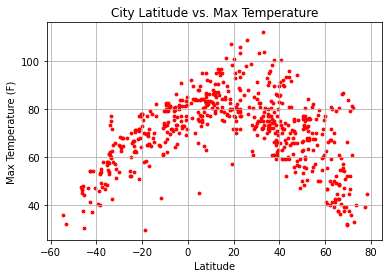

In [9]:
x = city_data_df['Lat']
y = city_data_df['Max Temp']
plt.scatter(x, y, s=8, c='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature')
plt.grid()
plt.savefig('output_data/LatitudeVsMaxTemp.png')

## Latitude vs. Humidity Plot

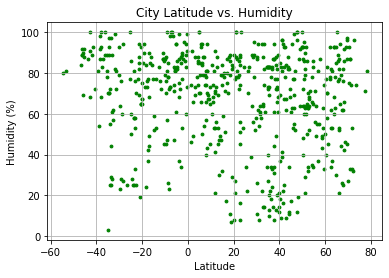

In [10]:
x = city_data_df['Lat']
y = city_data_df['Humidity']
plt.scatter(x, y, s=8, c='Green')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.grid()
plt.savefig('output_data/LatitudeVsHum.png')

## Latitude vs. Cloudiness Plot

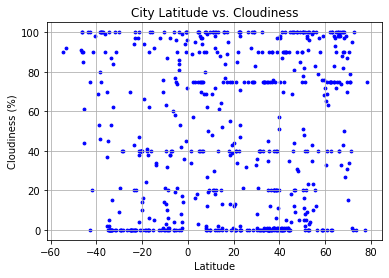

In [11]:
x = city_data_df['Lat']
y = city_data_df['Cloudiness']
plt.scatter(x, y, s=8, c='Blue')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')
plt.grid()
plt.savefig('output_data/LatitudeVsCloud.png')

## Latitude vs. Wind Speed Plot

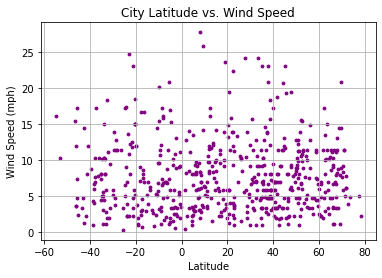

In [12]:
x = city_data_df['Lat']
y = city_data_df['Wind Speed']
plt.scatter(x, y, s=8, c='Purple')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed')
plt.grid()
plt.savefig('output_data/LatitudeVsWind.png')

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_reg_plot(df, title_name, y_column_name, y_label, file_name, xy):
    x = df['Lat']
    y = df[y_column_name]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq,xy,fontsize=15,color="red", fontweight="bold")
    plt.title(title_name)
    
    print(f"The line equation is: {line_eq}")
    print(f"The r-squared is: {rvalue}")
    
    plt.savefig(file_name)

In [14]:
# Create Northern and Southern Hemisphere DataFrames
north_df = city_data_df.loc[city_data_df['Lat'] > 0, :]
south_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The line equation is: y = -0.49x + 91.41
The r-squared is: -0.636650658726989


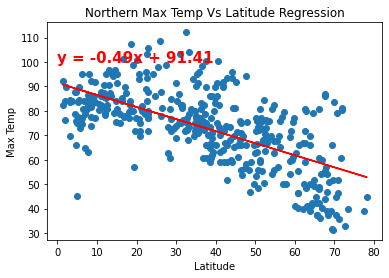

In [15]:
linear_reg_plot(north_df,
                'Northern Max Temp Vs Latitude Regression',
                'Max Temp',
                'Max Temp',
                'output_data/NorthernMaxTempVsLat.png',
                (0,100))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The line equation is: y = 0.73x + 80.97
The r-squared is: 0.7870032966746358


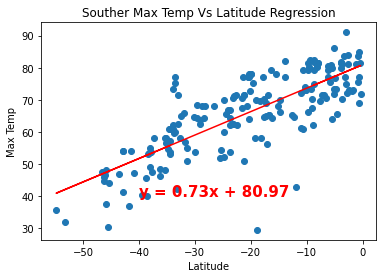

In [16]:
linear_reg_plot(south_df,
                'Souther Max Temp Vs Latitude Regression',
                'Max Temp',
                'Max Temp',
                'output_data/SouthernMaxTempVsLat.png',
                (-40,40))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The line equation is: y = -0.06x + 66.94
The r-squared is: -0.04667089709397789


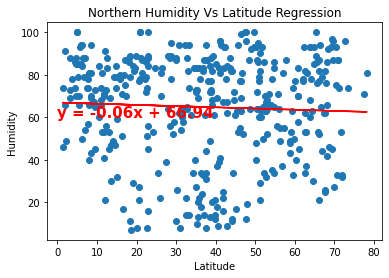

In [17]:
linear_reg_plot(north_df,
                'Northern Humidity Vs Latitude Regression',
                'Humidity',
                'Humidity',
                'output_data/NorthernHumidityVsLat.png',
                (0, 60))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The line equation is: y = 0.02x + 72.97
The r-squared is: 0.012264278299289577


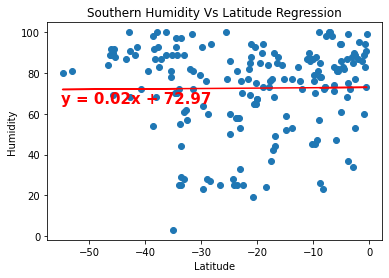

In [18]:
linear_reg_plot(south_df,
                'Southern Humidity Vs Latitude Regression',
                'Humidity',
                'Humidity',
                'output_data/SouthernHumidityVsLat.png',
                (-55, 65))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The line equation is: y = 0.14x + 45.53
The r-squared is: 0.07550188729820762


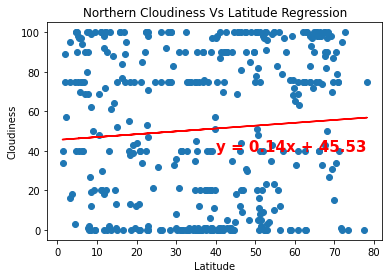

In [19]:
linear_reg_plot(north_df,
                'Northern Cloudiness Vs Latitude Regression',
                'Cloudiness',
                'Cloudiness',
                'output_data/NorthernCloudinessVsLat.png',
                (40, 40))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The line equation is: y = -0.37x + 35.43
The r-squared is: -0.12956676186365837


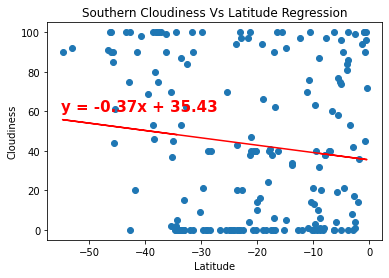

In [26]:
linear_reg_plot(south_df,
                'Southern Cloudiness Vs Latitude Regression',
                'Cloudiness',
                'Cloudiness',
                'output_data/SouthernCloudinessVsLat.png',
                (-55, 60))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The line equation is: y = 0.0x + 7.74
The r-squared is: 0.0020130063382712846


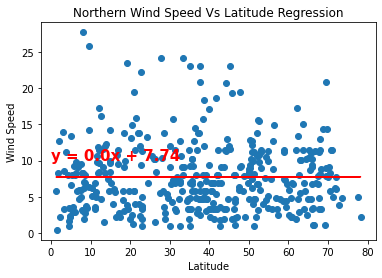

In [25]:
linear_reg_plot(north_df,
                'Northern Wind Speed Vs Latitude Regression',
                'Wind Speed',
                'Wind Speed',
                'output_data/NorthernWindVsLat.png',
                (0, 10))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The line equation is: y = -0.03x + 7.04
The r-squared is: -0.0751541299113186


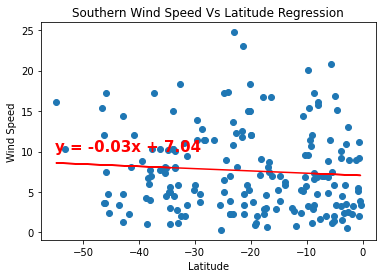

In [24]:
linear_reg_plot(south_df,
                'Southern Wind Speed Vs Latitude Regression',
                'Wind Speed',
                'Wind Speed',
                'output_data/SouthernWindVsLat.png',
                (-55, 10))